<a href="https://colab.research.google.com/github/deepeshgrover/IAS_fellowship_assignments/blob/main/IAS_fellowship_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Compilation 
1. Coloured Image to gray scale
2. Image translations
3. Image Rotation 
4. Scaling 
5. Resizing 
6. Image Pyramids 
7. Cropping 
8. Masking 
9. Thresholding 
10. Dilation and Erosion 
11. Edge detection 


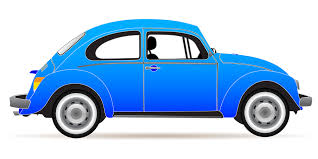

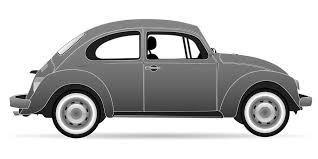

In [36]:
import cv2
from google.colab.patches import cv2_imshow
# Load input image
image = cv2.imread('/content/beatle.jpg')
cv2_imshow(image)
cv2.waitKey()

# cvtColor, to convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#Grayscaling is process by which an image is converted from a full color to shades of grey (black & white

cv2_imshow(gray_image)
cv2.waitKey()
cv2.destroyAllWindows()



# Translation

(159, 318, 3)


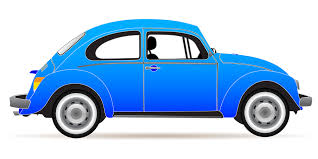

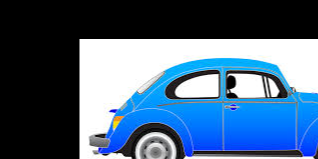

In [26]:
#Translations
#This an affine transform that simply shifts the position of an image.

#Using cv2.warpAffine to implement these transformations

import cv2
import numpy as np

image = cv2.imread('/content/beatle.jpg')

print(image.shape)

# Store height and width of the image
height, width = image.shape[:2]


quarter_height, quarter_width = height//4, width/4

#       | 1 0 Tx |
#  T  = | 0 1 Ty |
#T = np.float32([[1,0,w],[0,1,h]])
# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
cv2_imshow(image)
cv2_imshow(img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

# Rotation 


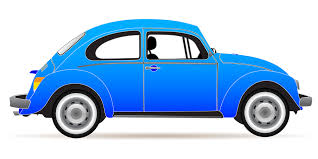

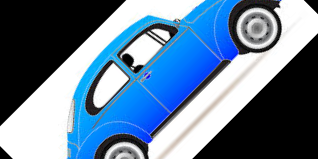

In [31]:

import cv2
import numpy as np

image = cv2.imread('/content/beatle.jpg')
height, width = image.shape[:2]

# Divide by two to rotate the image around its centre
rotation_matrix=cv2.getRotationMatrix2D((width/2,height/2),45,1)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
cv2_imshow(image)
cv2_imshow(rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

# Scaling


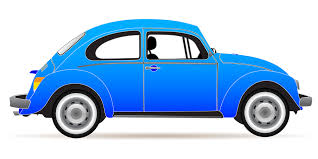

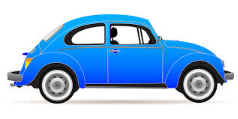

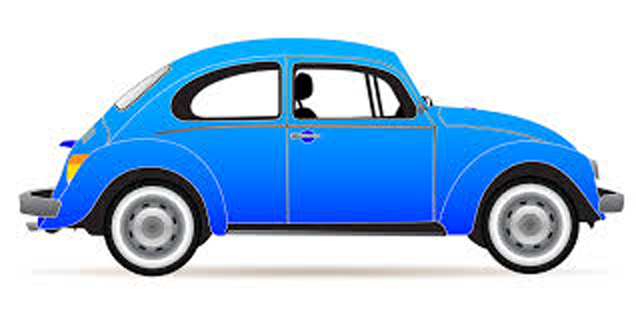

In [41]:
"""Scaling, re-sizing and interpolations
Re-sizing  using the cv2.resize function, it's arguments are:

cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)"""

import cv2
import numpy as np

# load our input image
image = cv2.imread('/content/beatle.jpg')
cv2_imshow(image)
# make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
cv2_imshow(image_scaled) 
cv2.waitKey()

# double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2_imshow(img_scaled)
cv2.waitKey()



cv2.destroyAllWindows()

#Image pyraminding (used in object detection)

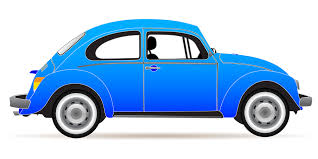

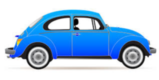

In [45]:
import cv2

image = cv2.imread('/content/beatle.jpg')

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

cv2_imshow(image)

cv2_imshow(smaller )

cv2.waitKey(0)
cv2.destroyAllWindows()

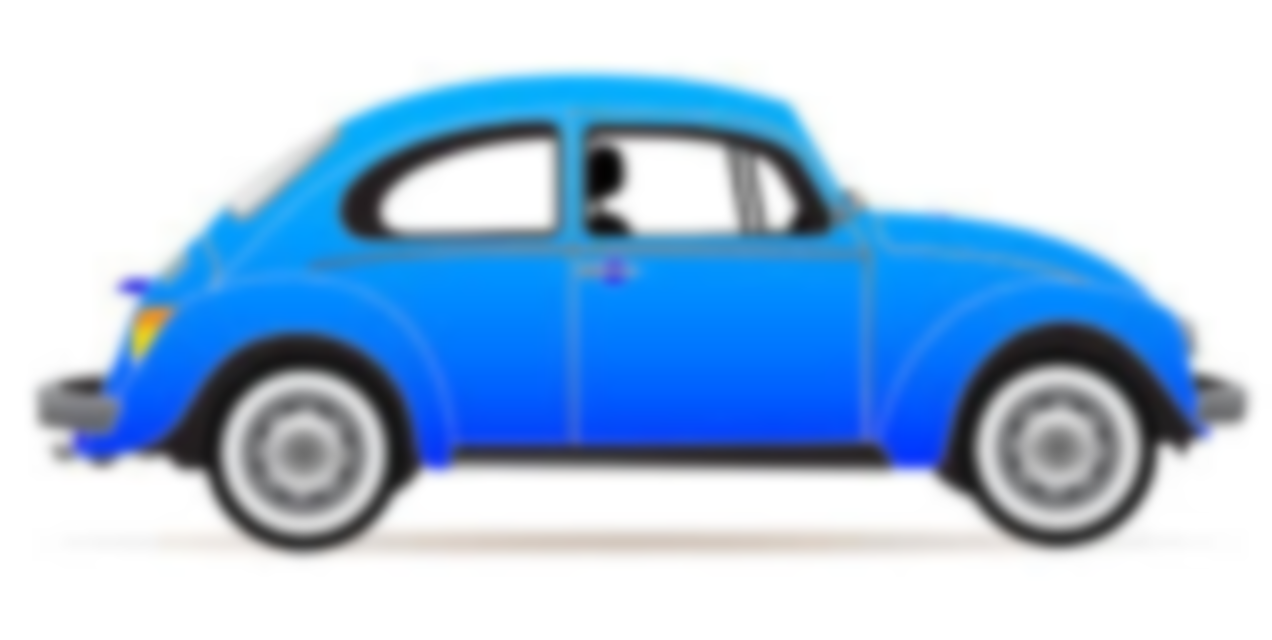

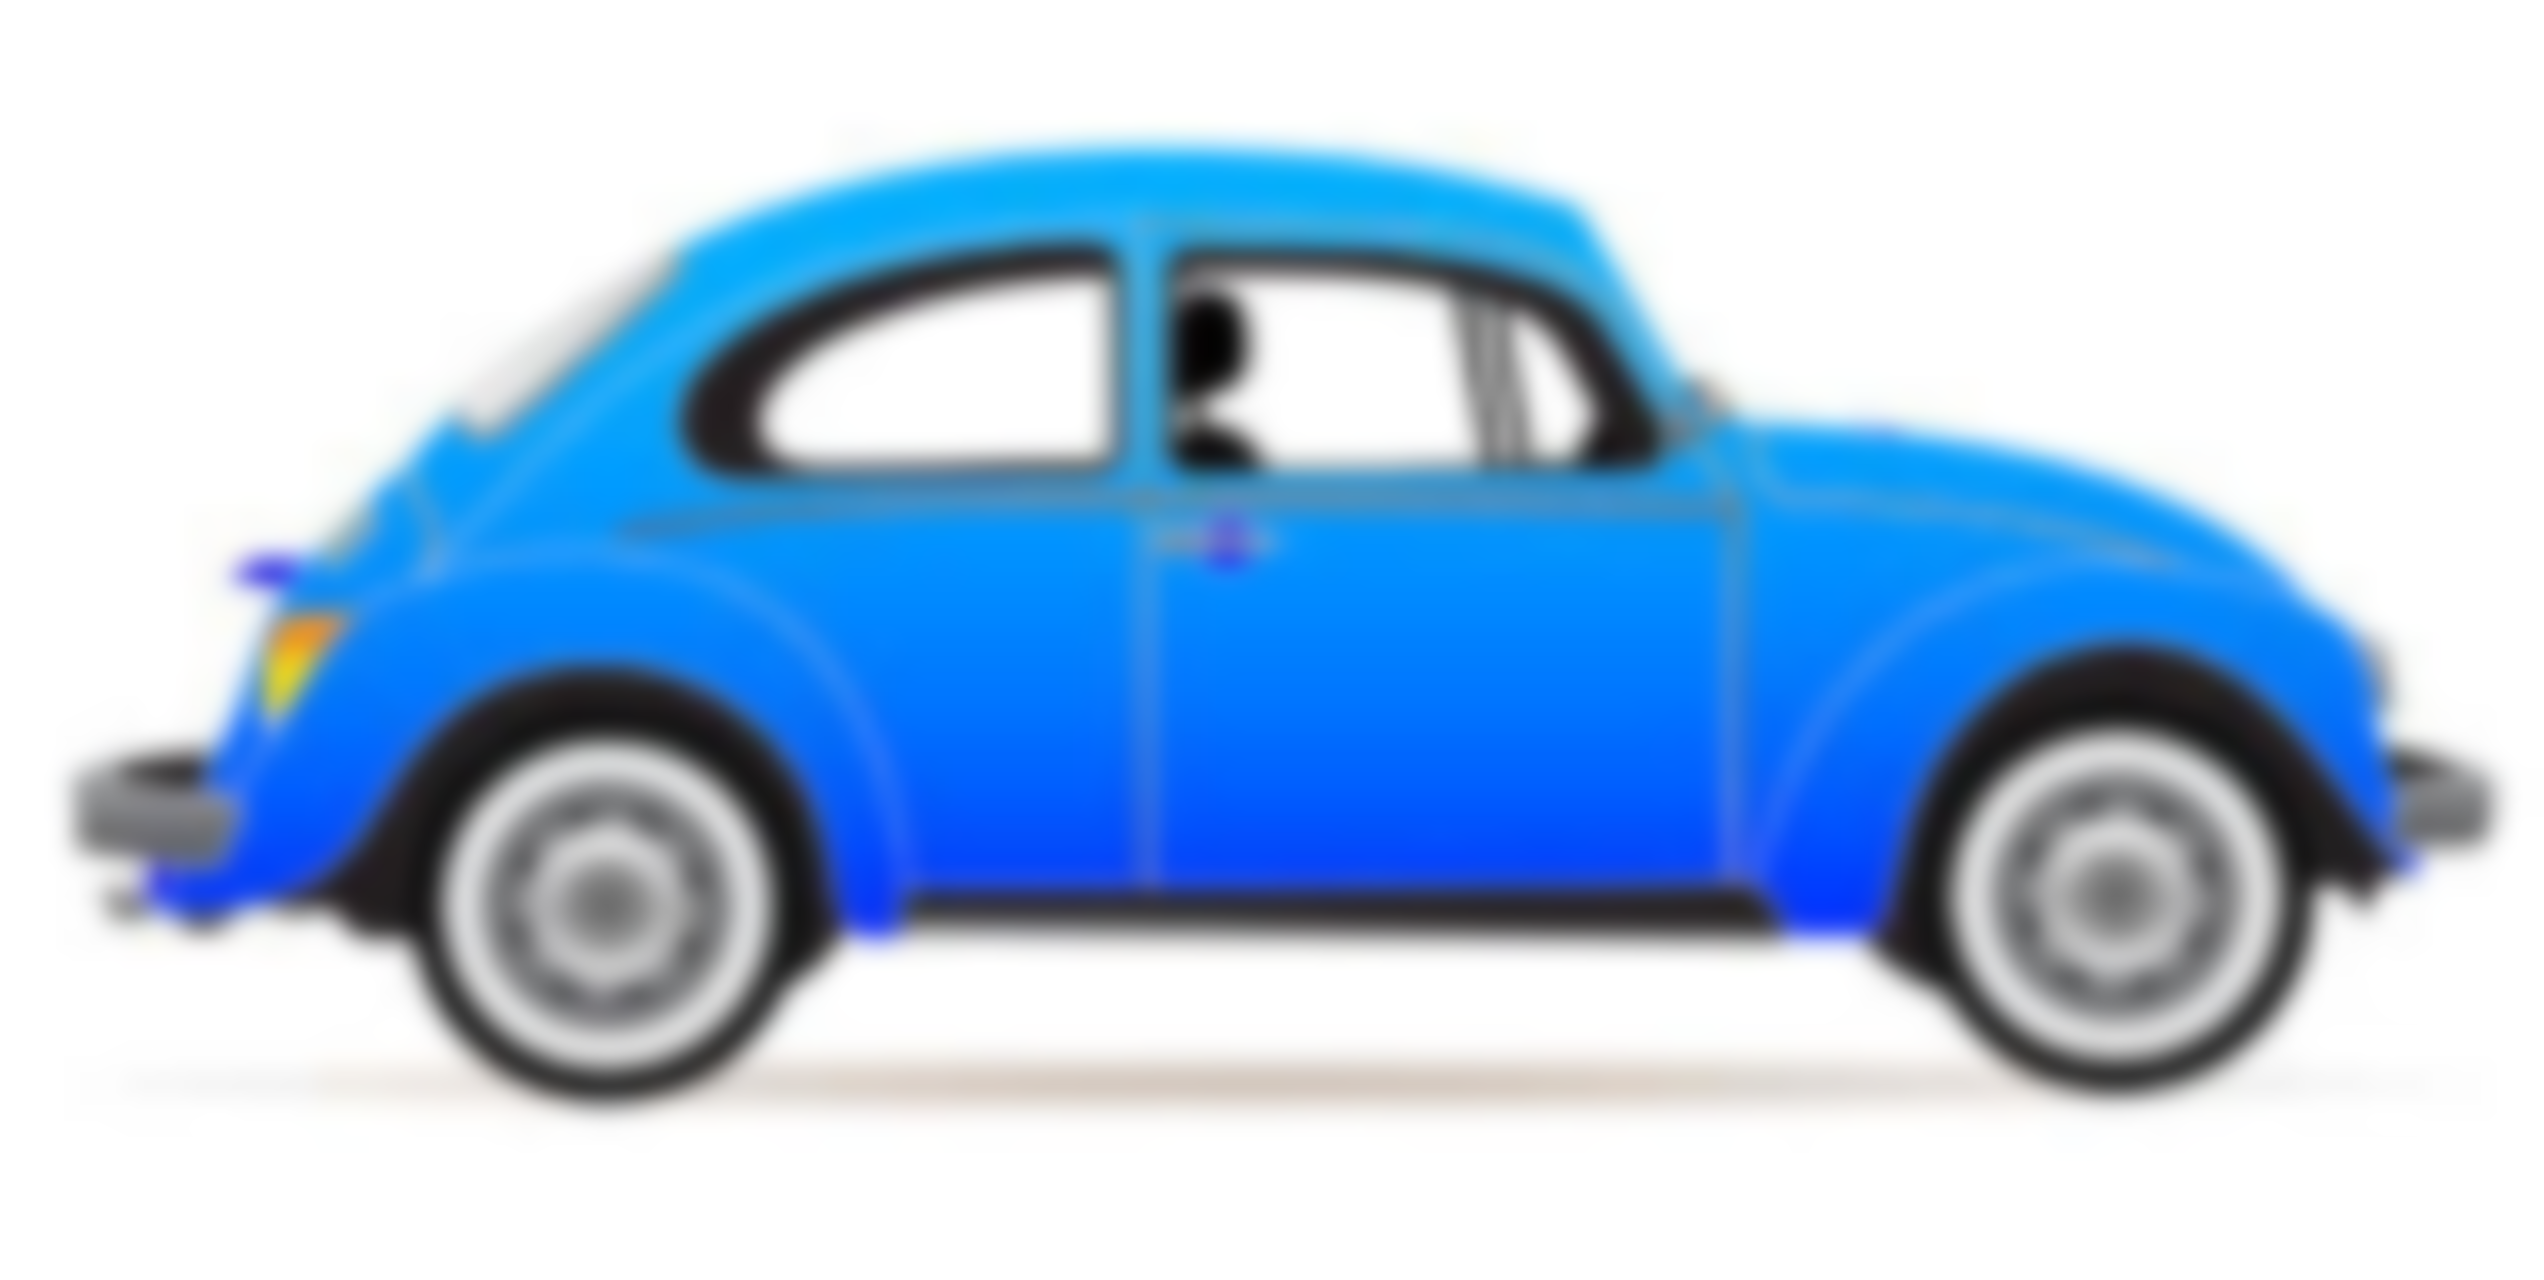

In [48]:
for i in range(2):
    smaller = cv2.pyrUp(smaller)
    cv2_imshow(smaller )

cv2.waitKey(0)
cv2.destroyAllWindows()

# Croping

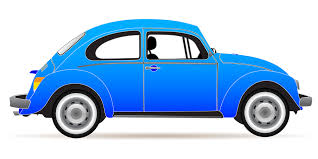

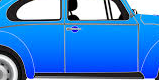

In [51]:
import cv2
import numpy as np

image = cv2.imread('/content/beatle.jpg')
height, width = image.shape[:2]

# get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

#get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# use indexing to crop out the rectangle 
cropped = image[start_row:end_row , start_col:end_col]

cv2_imshow(image)
cv2.waitKey(0) 
cv2_imshow(cropped) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [52]:
start_row, start_col = int(height * .25), int(width * .25)

#  ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

In [53]:
print(start_row,start_col,end_row,end_col)

39 79 119 238


# Masking 

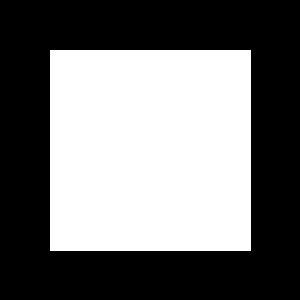

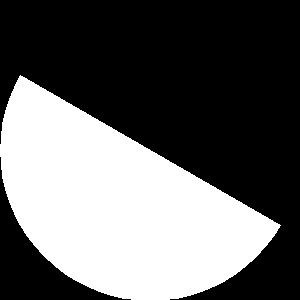

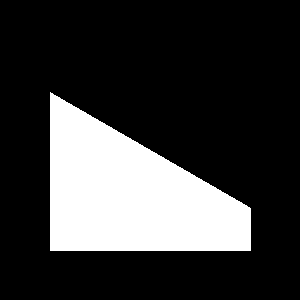

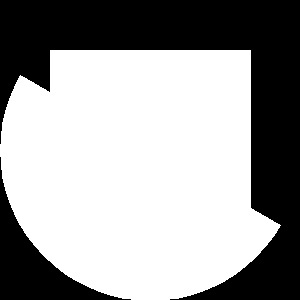

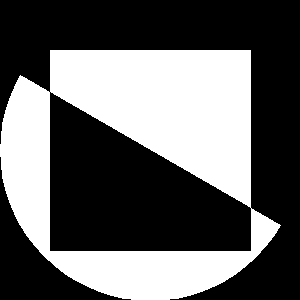

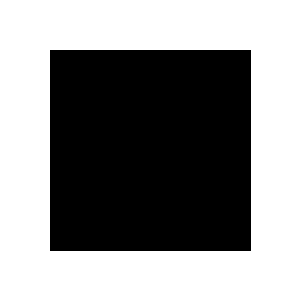

In [57]:
import cv2
import numpy as np


# Making a square
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2_imshow(square)
cv2.waitKey(0)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 180, 255, -1)
cv2_imshow(ellipse)
cv2.waitKey(0)

cv2.destroyAllWindows()


# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
cv2_imshow( And)
cv2.waitKey(0)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2_imshow( bitwiseOr)
cv2.waitKey(0) 

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2_imshow(bitwiseXor)
cv2.waitKey(0)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
cv2_imshow(bitwiseNot_sq)
cv2.waitKey(0)



cv2.destroyAllWindows()

# Thresholding

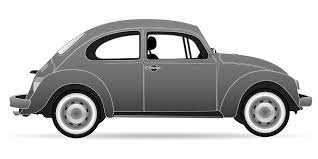

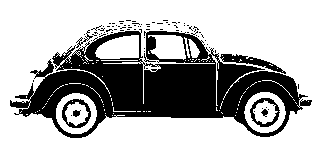

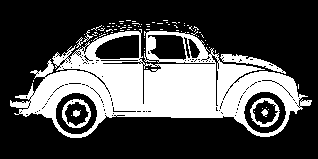

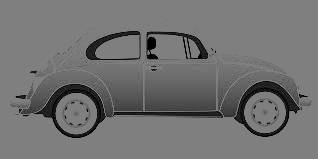

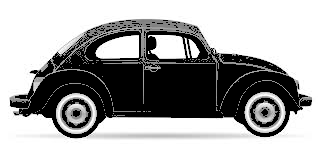

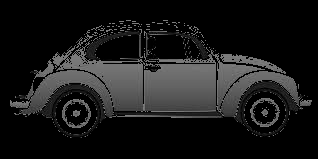

In [62]:
import cv2
import numpy as np

# Load image as greyscale 
image = cv2.imread('/content/beatle.jpg',0)
cv2_imshow(image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh1)




# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2_imshow(thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2_imshow(thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2_imshow(thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

# Dilation and Erosion 


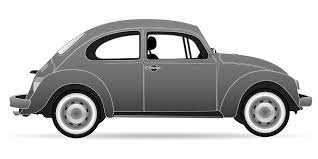

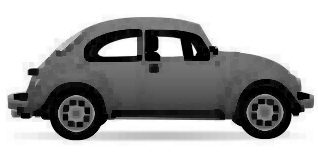

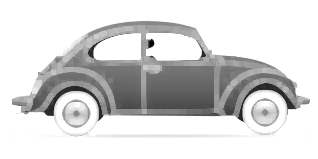

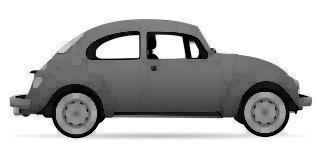

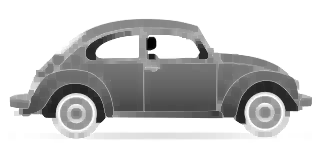

In [63]:
import cv2
import numpy as np

image = cv2.imread('/content/beatle.jpg', 0)

cv2_imshow(image)
cv2.waitKey(0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
cv2_imshow( erosion)
cv2.waitKey(0)

# 
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2_imshow(dilation)
cv2.waitKey(0)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2_imshow( opening)
cv2.waitKey(0)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)
cv2.waitKey(0)


cv2.destroyAllWindows()

# Edge detection using Canny edge


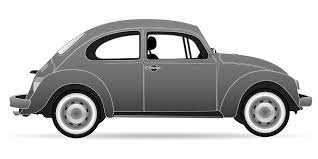

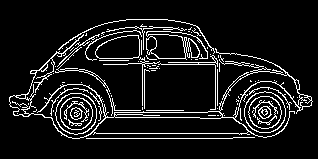

In [67]:
import cv2
import numpy as np

image = cv2.imread('/content/beatle.jpg',0)

# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
cv2_imshow(image)
cv2_imshow(canny)
cv2.waitKey(0)

cv2.destroyAllWindows()